In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [342]:
susceptible = np.zeros(200)
infected = np.zeros(200)
resistant = np.zeros(200)
susceptible[0] = 1e7
infected[0] = 10
infection_length = 14
growth_rate = np.concatenate([
    np.repeat(3.4, 20),
    np.linspace(3.4, 2.2, 5),
    np.repeat(2.2, 15),
    np.linspace(2.2, 1.6, 5),
    np.repeat(1.6, 15),
    np.linspace(1.6, .9, 30),
    np.repeat(.7, 200)
])[:200]
for v in range(len(susceptible)):
    if v != 0:
        susceptible[v] = susceptible[v - 1] - infected[v - 1] * growth_rate[v]/infection_length
        infected[v] = infected[v - 1] + infected[v - 1] * growth_rate[v]/infection_length - infected[v - 1]/infection_length
        resistant[v] = resistant[v - 1] + infected[v - 1]/infection_length

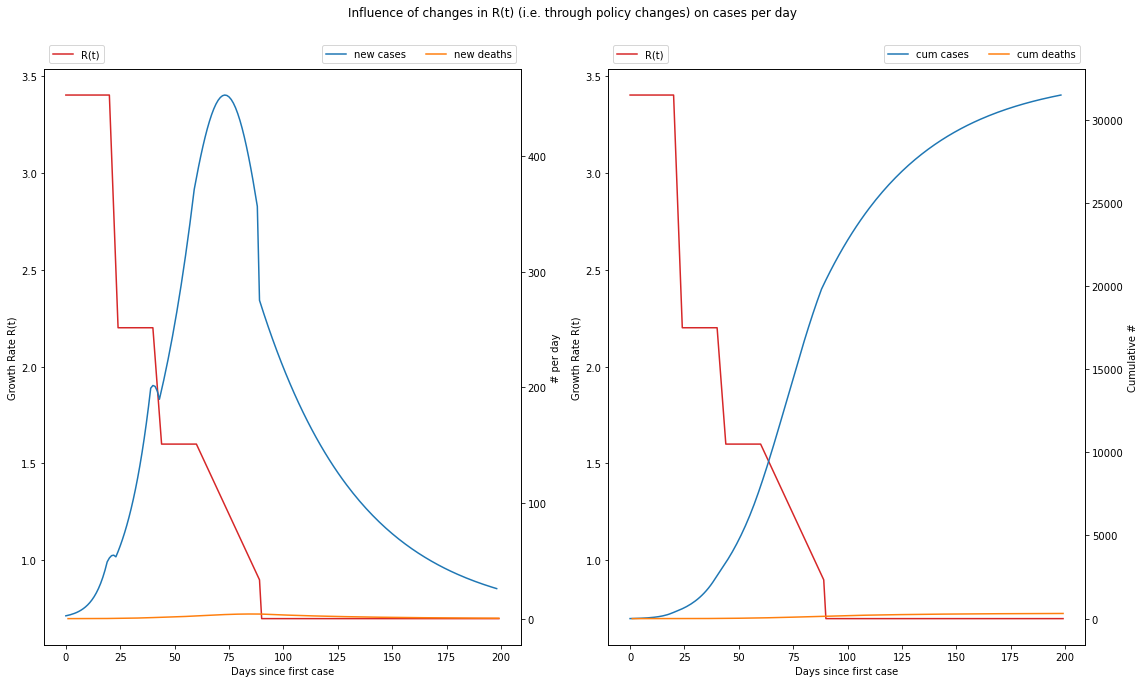

In [343]:
fig, (ax1, ax3) = plt.subplots(1,2, figsize=(16, 9))
color = 'tab:red'
ax1.set_xlabel('Days since first case')
ax1.set_ylabel('Growth Rate R(t)')
pd.Series(growth_rate, name='R(t)').plot(ax=ax1, color=color).legend(loc='upper left', bbox_to_anchor=(0, 1.05), ncol=3)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('# per day')  # we already handled the x-label with ax1
pd.concat([
    pd.Series(susceptible, name='new cases').diff(-1),
    pd.Series(resistant * .01, name='new deaths').diff(1)
], axis=1).plot(ax=ax2).legend(loc='upper right', bbox_to_anchor=(1.0, 1.05), ncol=3)

color = 'tab:red'
ax3.set_xlabel('Days since first case')
ax3.set_ylabel('Growth Rate R(t)')
pd.Series(growth_rate, name='R(t)').plot(ax=ax3, color=color).legend(loc='upper left', bbox_to_anchor=(0, 1.05), ncol=3)
ax3.tick_params(axis='y')

ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax4.set_ylabel('Cumulative #')  # we already handled the x-label with ax1
pd.concat([
    pd.Series(susceptible, name='cum cases').diff(-1),
    pd.Series(resistant * .01, name='cum deaths').diff(1)
], axis=1).cumsum().plot(ax=ax4).legend(loc='upper right', bbox_to_anchor=(1.0, 1.05), ncol=3)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.suptitle('Influence of changes in R(t) (i.e. through policy changes) on cases per day', y=1.05)
fig.set_facecolor('white')
plt.show()

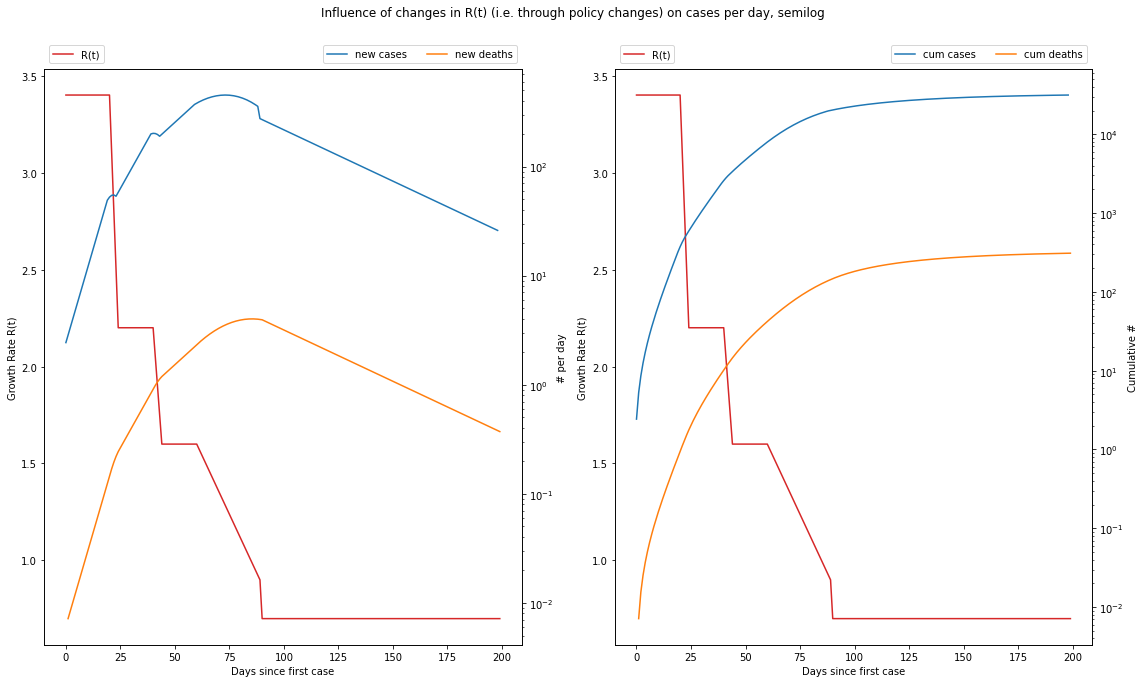

In [344]:
fig, (ax1, ax3) = plt.subplots(1,2, figsize=(16, 9))
color = 'tab:red'
ax1.set_xlabel('Days since first case')
ax1.set_ylabel('Growth Rate R(t)')
pd.Series(growth_rate, name='R(t)').plot(ax=ax1, color=color).legend(loc='upper left', bbox_to_anchor=(0, 1.05), ncol=3)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('# per day')  # we already handled the x-label with ax1
pd.concat([
    pd.Series(susceptible, name='new cases').diff(-1),
    pd.Series(resistant * .01, name='new deaths').diff(1)
], axis=1).plot(ax=ax2, logy=True).legend(loc='upper right', bbox_to_anchor=(1.0, 1.05), ncol=3)

color = 'tab:red'
ax3.set_xlabel('Days since first case')
ax3.set_ylabel('Growth Rate R(t)')
pd.Series(growth_rate, name='R(t)').plot(ax=ax3, color=color).legend(loc='upper left', bbox_to_anchor=(0, 1.05), ncol=3)
ax3.tick_params(axis='y')

ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax4.set_ylabel('Cumulative #')  # we already handled the x-label with ax1
pd.concat([
    pd.Series(susceptible, name='cum cases').diff(-1),
    pd.Series(resistant * .01, name='cum deaths').diff(1)
], axis=1).cumsum().plot(ax=ax4, logy=True).legend(loc='upper right', bbox_to_anchor=(1.0, 1.05), ncol=3)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.suptitle('Influence of changes in R(t) (i.e. through policy changes) on cases per day, semilog', y=1.05)
fig.set_facecolor('white')
plt.show()

In [345]:
susceptible = np.zeros((200, 2))
infected = np.zeros((200, 2))
resistant = np.zeros((200, 2))
susceptible[0:] = 5e6, 5e6
infected[0,:] = 10, 1
infection_length = 14
growth_rate_a = np.concatenate([
    np.repeat(3.4, 10),
    np.linspace(3.4, .7, 10),
    np.repeat(.7, 200)
])[:200]
growth_rate_b = np.concatenate([
    np.repeat(3.4, 10),
    np.linspace(3.4, 1.5, 10),
    np.repeat(1.5, 200)
])[:200]
growth_rate = np.column_stack((np.array(growth_rate_a), np.array(growth_rate_b)))
for v in range(len(susceptible)):
    if v != 0:
        susceptible[v] = susceptible[v - 1] - infected[v - 1] * growth_rate[v]/infection_length
        infected[v] = infected[v - 1] + infected[v - 1] * growth_rate[v]/infection_length - infected[v - 1]/infection_length
        resistant[v] = resistant[v - 1] + infected[v - 1]/infection_length

In [346]:
new_infections_per_day = pd.DataFrame(susceptible, columns=['a', 'b']).diff(-1)
new_infections_per_day = new_infections_per_day.assign(total=new_infections_per_day.a + new_infections_per_day.b)

new_deaths_per_day = pd.DataFrame(resistant * .01, columns=['a', 'b']).diff(1)
new_deaths_per_day = new_deaths_per_day.assign(total=new_deaths_per_day.a + new_deaths_per_day.b)

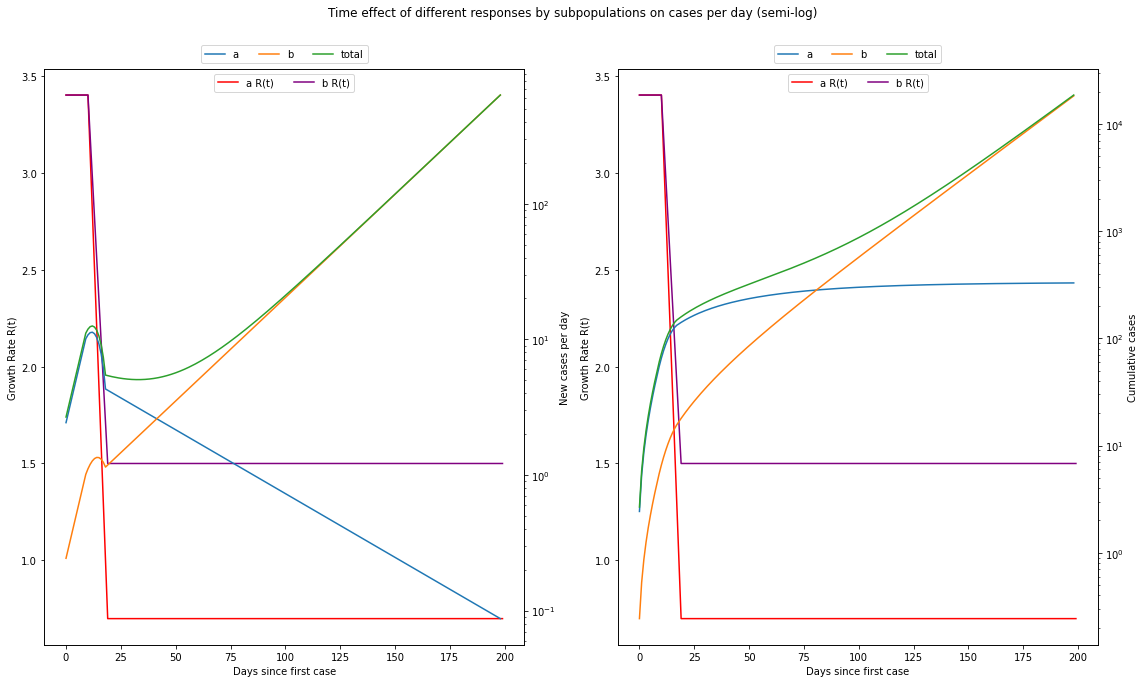

In [347]:
fig, (ax1, ax3) = plt.subplots(1,2, figsize=(16, 9))
color = 'tab:red'
ax1.set_xlabel('Days since first case')
ax1.set_ylabel('Growth Rate R(t)')
pd.concat([
    pd.Series(growth_rate_a, name='a R(t)'),
    pd.Series(growth_rate_b, name='b R(t)')
], axis=1).plot(ax=ax1, color=['red', 'purple']).legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), ncol=3, fancybox=True)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('New cases per day')  # we already handled the x-label with ax1
new_infections_per_day.plot(ax=ax2, logy=True).legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True)

color = 'tab:red'
ax3.set_xlabel('Days since first case')
ax3.set_ylabel('Growth Rate R(t)')
pd.concat([
    pd.Series(growth_rate_a, name='a R(t)'),
    pd.Series(growth_rate_b, name='b R(t)')
], axis=1).plot(ax=ax3, color=['red', 'purple']).legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=3, fancybox=True)

ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax4.set_ylabel('Cumulative cases')  # we already handled the x-label with ax1
new_infections_per_day.cumsum().plot(ax=ax4, logy=True).legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.suptitle('Time effect of different responses by subpopulations on cases per day (semi-log)', y=1.05)
fig.set_facecolor('white')
plt.show()

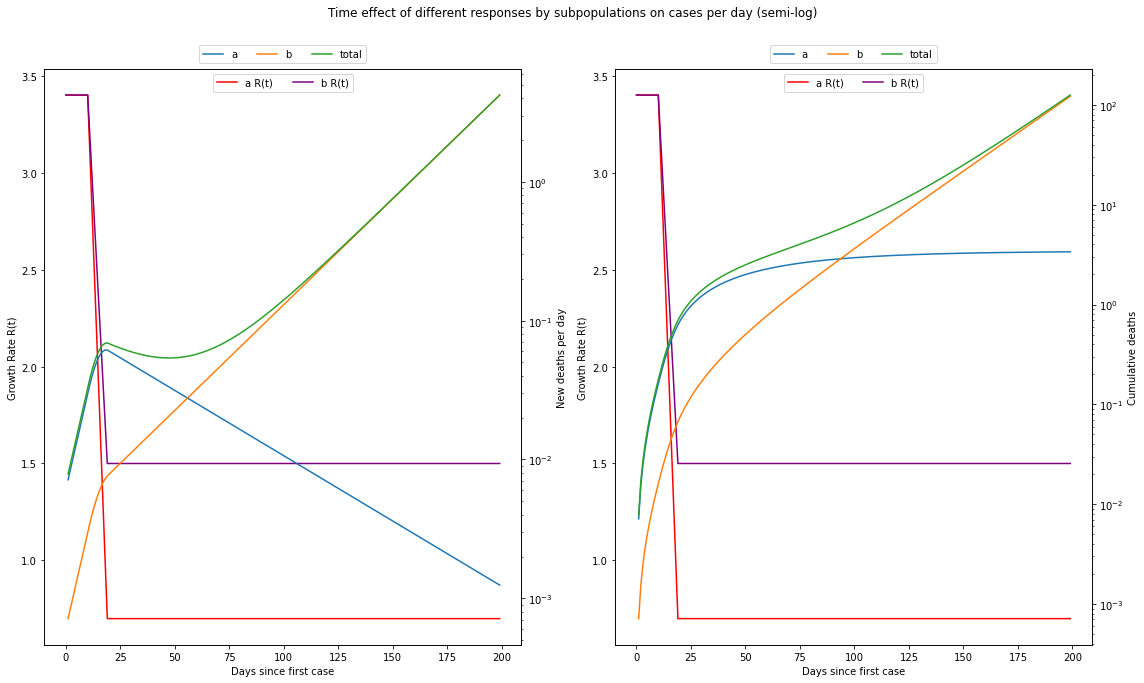

In [348]:
fig, (ax1, ax3) = plt.subplots(1,2, figsize=(16, 9))
color = 'tab:red'
ax1.set_xlabel('Days since first case')
ax1.set_ylabel('Growth Rate R(t)')
pd.concat([
    pd.Series(growth_rate_a, name='a R(t)'),
    pd.Series(growth_rate_b, name='b R(t)')
], axis=1).plot(ax=ax1, color=['red', 'purple']).legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), ncol=3, fancybox=True)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('New deaths per day')  # we already handled the x-label with ax1
new_deaths_per_day.plot(ax=ax2, logy=True).legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True)

color = 'tab:red'
ax3.set_xlabel('Days since first case')
ax3.set_ylabel('Growth Rate R(t)')
pd.concat([
    pd.Series(growth_rate_a, name='a R(t)'),
    pd.Series(growth_rate_b, name='b R(t)')
], axis=1).plot(ax=ax3, color=['red', 'purple']).legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=3, fancybox=True)

ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax4.set_ylabel('Cumulative deaths')  # we already handled the x-label with ax1
new_deaths_per_day.cumsum().plot(ax=ax4, logy=True).legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.suptitle('Time effect of different responses by subpopulations on deaths per day (semi-log)', y=1.05)
fig.set_facecolor('white')
plt.show()